<a href="https://colab.research.google.com/github/Drodricks0/PISCO_ML_Project/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 


df = pd.read_csv('/content/kelp_PISCO_swath_yrly_with_impact_rei_MM_140309.csv',encoding = "ISO-8859-1")
df.head() 

,Unnamed: 0,X,site,lat_wgs84,lon_wgs84,bioregion,subregion,year,Anthopleura.sola,swath_antxan,density.Aplysia_californica,swath_balnub,density.Cancer_spp.,swath_cencor,Costaria.costatum,density.Crassedoma_giganteum,swath_cryste,density.Cypraea_spadicea,density.Cystoseira_osmundacea,density.Dermasterias_imbricata,Eisenia.arborea,Haliotis.spp,Kelletia.kelletii,Laminaria.farlowii,Laminaria.setchellii,density.Lophogorgia_chilensis,density.Loxorhynchus_grandis,swath_loxscy,swath_lytanaad,swath_macstipes,swath_medaeq,density.Megathura_crenulata,swath_meggib,swath_megund,swath_metspp,swath_mimfol,density.Muricea_californica,density.Muricea_fruticosa,swath_nerlue,density.Orthasterias_koehleri,...,density.Stylaster_californicus,no.yrs.sampled,rmv.ind,dat.source,type,climate,fishing,full,land,other,wave_exp,rei,surge,meansst_3kbuffer,meansummersst_3kbuffer,acid,beach_a,coastal_e,dem_d,dem_nd_hb,dem_nd_lb,dep_ocean,inorganic,invasives,light_pol,nutrients,oil,organic,pel_hb,pel_lb,pens,pollution,pplants,rec_fish,sed_decrease,sed_increase,shipping,sst,trash,uv
0,611,1136,SPOUTING_HORN_WALL,44.814530,-124.066785,Mendocinian,OR,2011,0.0,0.033333,0.0,0.0,0.000000,0.0,0.008333,0.0000,0.141667,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.283333,0.0,...,0.0,1,yes,pisco,swath,5.513851,1.206951,11.932325,3.007962,2.203562,299,500702,20828,13.500,11.550000,2.710482,1.175437,0.0,0.104953,0.011768,0.186366,0.854531,0.164849,1.800536,0.437976,0.230062,0,0.551025,0.0,0,0,0.782208,0.0,0.447762,0.213085,1.240800,0.036893,2.205759,0.0,2.006757
1,610,1135,SPOUTING_HORN_KELP,44.813626,-124.065271,Mendocinian,OR,2011,0.0,0.000000,0.0,0.0,0.070833,0.0,0.000000,0.0125,0.075000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.008333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.808333,0.0,...,0.0,1,yes,pisco,swath,5.521493,1.207823,11.966370,3.029874,2.207181,299,500702,20828,13.500,11.550000,2.710482,1.175437,0.0,0.105094,0.011783,0.186617,0.854434,0.166612,1.800550,0.460471,0.231119,0,0.553704,0.0,0,0,0.787416,0.0,0.447762,0.212900,1.242958,0.038833,2.212874,0.0,2.006757
2,709,1308,WHALE_COVE,44.789063,-124.070625,Mendocinian,OR,2011,0.0,0.001389,0.0,0.0,0.009722,0.0,0.002778,0.0000,0.040278,0.0,0.0,0.000000,0.018056,0.0,0.0,0.0,0.040278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162500,0.0,...,0.0,1,yes,pisco,swath,5.563937,1.203462,11.757598,2.818287,2.171911,299,502171,22000,13.500,11.681344,2.710482,1.164208,0.0,0.104387,0.011704,0.185362,0.857738,0.145322,1.793776,0.355144,0.203274,0,0.462811,0.0,0,0,0.745505,0.0,0.447762,0.306184,1.175457,0.030103,2.252390,0.0,2.006757
3,312,590,OTTER_CREST,44.756553,-124.069457,Mendocinian,OR,2011,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0000,0.097222,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.497222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.016667,0.0,...,0.0,1,yes,pisco,swath,5.178033,1.091203,10.978578,2.575892,2.133448,284,495846,25000,12.725,11.681344,2.710482,1.110108,0.0,0.104387,0.011704,0.185362,0.861292,0.133821,1.754222,0.300000,0.177190,0,0.338245,0.0,0,0,0.742686,0.0,0.447762,0.384126,1.093587,0.030103,2.287617,0.0,2.006757
4,319,601,OTTER_ROCK_WALL,44.732572,-124.069731,Mendocinian,OR,2010,0.0,1.666667,0.0,0.0,0.000000,0.0,0.000000,0.0000,0.008333,0.0,0.0,0.008333,0.000000,0.0,0.0,0.0,3.141667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.241667,0.0,...,0.0,2,yes,pisco,swath,5.272214,1.149363,10.931376,2.451088,2.058710,284,495814,26414,11.950,11.775000,2.710482,1.068152,0.0,0.104522,0.011719,0.185602,0.864674,0.147076,1.698244,0.331049,0.176792,0,0.267489,0.0,0,0,0.709368,0.0,0.447762,0.436159,1.015355,0.030103,2.161806,0.0,2.006757


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Columns: 104 entries, Unnamed: 0 to uv
dtypes: float64(88), int64(10), object(6)
memory usage: 572.9+ KB


1. Source is from a source is from a colleague that collected this data via scuba

2.  Data focuses on various invertebrates and fish identified by skilled scuba divers who observed them on their diving excursions. There are species counts based on density vs. count.

3. The target will be Strongylocentrotus purpuratus (purple urchin) and whether or not the higher concentration of this invertebrate affects the invertebrates and the concentration of various kelp species.

4. Regression

5. Feature count is TBD depending on whether or not I can obtain more data from colleague

6. 705 rows

7. Luckily I have my colleague to answer any questions about the data that is presented in this data set, however, trimming down the feature count would be the biggest challenge. I dont want to over trim, but there are various features that I believe can be removed.


***Overall, this data set is more detailed than the other one I am proposing, and my roommate assisted in gathering this data, so I have a specialist at the ready to answer questions.

In [47]:
df = df[['site','lat_wgs84','lon_wgs84','bioregion','year','Anthopleura.sola','density.Aplysia_californica','density.Cancer_spp.','Costaria.costatum','density.Crassedoma_giganteum','density.Cypraea_spadicea','density.Cystoseira_osmundacea','density.Dermasterias_imbricata','Eisenia.arborea','Haliotis.spp','Kelletia.kelletii','Laminaria.farlowii','Laminaria.setchellii','density.Lophogorgia_chilensis','density.Loxorhynchus_grandis','density.Megathura_crenulata','density.Muricea_californica','density.Muricea_fruticosa','density.Orthasterias_koehleri','density.Panulirus_interruptus','Parastichopus.californicus','Parastichopus.parvimensis','density.Patiria_miniata','Pisaster.brevispinus','Pisaster.giganteus','Pisaster.ochraceus','Pterygophora.californica','density.Pugettia_producta','density.Pycnopodia_helianthoides','Strongylocentrotus.franciscanus','Strongylocentrotus.purpuratus','density.Urticina_piscivora','density.Stylaster_californicus','climate']]
df.head()

,site,lat_wgs84,lon_wgs84,bioregion,year,Anthopleura.sola,density.Aplysia_californica,density.Cancer_spp.,Costaria.costatum,density.Crassedoma_giganteum,density.Cypraea_spadicea,density.Cystoseira_osmundacea,density.Dermasterias_imbricata,Eisenia.arborea,Haliotis.spp,Kelletia.kelletii,Laminaria.farlowii,Laminaria.setchellii,density.Lophogorgia_chilensis,density.Loxorhynchus_grandis,density.Megathura_crenulata,density.Muricea_californica,density.Muricea_fruticosa,density.Orthasterias_koehleri,density.Panulirus_interruptus,Parastichopus.californicus,Parastichopus.parvimensis,density.Patiria_miniata,Pisaster.brevispinus,Pisaster.giganteus,Pisaster.ochraceus,Pterygophora.californica,density.Pugettia_producta,density.Pycnopodia_helianthoides,Strongylocentrotus.franciscanus,Strongylocentrotus.purpuratus,density.Urticina_piscivora,density.Stylaster_californicus,climate
0,SPOUTING_HORN_WALL,44.814530,-124.066785,Mendocinian,2011,0.0,0.0,0.000000,0.008333,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008333,0.0,0.0,0.0,0.0,0.008333,0.333333,0.0,0.000000,0.050000,0.0,0.0,0.0,5.513851
1,SPOUTING_HORN_KELP,44.813626,-124.065271,Mendocinian,2011,0.0,0.0,0.070833,0.000000,0.0125,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.008333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.016667,0.000000,0.0,0.012500,0.404167,0.0,0.0,0.0,5.521493
2,WHALE_COVE,44.789063,-124.070625,Mendocinian,2011,0.0,0.0,0.009722,0.002778,0.0000,0.0,0.0,0.000000,0.018056,0.0,0.0,0.0,0.040278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.005556,0.922222,0.0,0.008333,0.522222,0.0,0.0,0.0,5.563937
3,OTTER_CREST,44.756553,-124.069457,Mendocinian,2011,0.0,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.497222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.019444,1.375000,0.0,0.022222,0.122222,0.0,0.0,0.0,5.178033
4,OTTER_ROCK_WALL,44.732572,-124.069731,Mendocinian,2010,0.0,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.008333,0.000000,0.0,0.0,0.0,3.141667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.150000,0.908333,0.0,0.050000,0.000000,0.0,0.0,0.0,5.272214


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   site                              705 non-null    object 
 1   lat_wgs84                         705 non-null    float64
 2   lon_wgs84                         705 non-null    float64
 3   bioregion                         705 non-null    object 
 4   year                              705 non-null    int64  
 5   Anthopleura.sola                  705 non-null    float64
 6   density.Aplysia_californica       705 non-null    float64
 7   density.Cancer_spp.               705 non-null    float64
 8   Costaria.costatum                 705 non-null    float64
 9   density.Crassedoma_giganteum      705 non-null    float64
 10  density.Cypraea_spadicea          705 non-null    float64
 11  density.Cystoseira_osmundacea     705 non-null    float64
 12  density.

In [49]:
df.isnull().sum()

site                                0
lat_wgs84                           0
lon_wgs84                           0
bioregion                           0
year                                0
Anthopleura.sola                    0
density.Aplysia_californica         0
density.Cancer_spp.                 0
Costaria.costatum                   0
density.Crassedoma_giganteum        0
density.Cypraea_spadicea            0
density.Cystoseira_osmundacea       0
density.Dermasterias_imbricata      0
Eisenia.arborea                     0
Haliotis.spp                        0
Kelletia.kelletii                   0
Laminaria.farlowii                  0
Laminaria.setchellii                0
density.Lophogorgia_chilensis       0
density.Loxorhynchus_grandis        0
density.Megathura_crenulata         0
density.Muricea_californica         0
density.Muricea_fruticosa           0
density.Orthasterias_koehleri       0
density.Panulirus_interruptus       0
Parastichopus.californicus          0
Parastichopu

In [51]:
df.loc[df['Anthopleura.sola'] > 0, 'Anthopleura.sola'] = 1    #making my data set into a present/non-present since im going to make this a classification project
df['Anthopleura.sola'].value_counts()

1.0    503
0.0    202
Name: Anthopleura.sola, dtype: int64

In [52]:
df.loc[df['density.Aplysia_californica'] > 0, 'density.Aplysia_californica'] = 1
df['density.Aplysia_californica'].value_counts()

0.0    529
1.0    176
Name: density.Aplysia_californica, dtype: int64

In [53]:
df.loc[df['density.Cancer_spp.'] > 0, 'density.Cancer_spp.'] = 1
df['density.Cancer_spp.'].value_counts()

0.0    470
1.0    235
Name: density.Cancer_spp., dtype: int64

In [54]:
df.loc[df['Costaria.costatum'] > 0, 'Costaria.costatum'] = 1
df['Costaria.costatum'].value_counts()

0.0    625
1.0     80
Name: Costaria.costatum, dtype: int64

In [55]:
df.loc[df['density.Crassedoma_giganteum'] > 0, 'density.Crassedoma_giganteum'] = 1
df['density.Crassedoma_giganteum'].value_counts()

1.0    493
0.0    212
Name: density.Crassedoma_giganteum, dtype: int64

In [56]:
df.loc[df['density.Cypraea_spadicea'] > 0, 'density.Cypraea_spadicea'] = 1
df['density.Cypraea_spadicea'].value_counts()

0.0    472
1.0    233
Name: density.Cypraea_spadicea, dtype: int64

In [57]:
df.loc[df['density.Cystoseira_osmundacea'] > 0, 'density.Cystoseira_osmundacea'] = 1
df['density.Cystoseira_osmundacea'].value_counts()

1.0    558
0.0    147
Name: density.Cystoseira_osmundacea, dtype: int64

In [59]:
df.loc[df['density.Dermasterias_imbricata'] > 0, 'density.Dermasterias_imbricata'] = 1
df['density.Dermasterias_imbricata'].value_counts()

1.0    502
0.0    203
Name: density.Dermasterias_imbricata, dtype: int64

In [60]:
df.loc[df['Eisenia.arborea'] > 0, 'Eisenia.arborea'] = 1
df['Eisenia.arborea'].value_counts()

0.0    433
1.0    272
Name: Eisenia.arborea, dtype: int64

In [61]:
df.loc[df['Haliotis.spp'] > 0, 'Haliotis.spp'] = 1
df['Haliotis.spp'].value_counts()

1.0    363
0.0    342
Name: Haliotis.spp, dtype: int64

In [62]:
df.loc[df['Kelletia.kelletii'] > 0, 'Kelletia.kelletii'] = 1
df['Kelletia.kelletii'].value_counts()

1.0    371
0.0    334
Name: Kelletia.kelletii, dtype: int64

In [63]:
df.loc[df['Laminaria.farlowii'] > 0, 'Laminaria.farlowii'] = 1
df['Laminaria.farlowii'].value_counts()

0.0    522
1.0    183
Name: Laminaria.farlowii, dtype: int64

In [64]:
df.loc[df['Laminaria.setchellii'] > 0, 'Laminaria.setchellii'] = 1
df['Laminaria.setchellii'].value_counts()

1.0    453
0.0    252
Name: Laminaria.setchellii, dtype: int64

In [65]:
df.loc[df['density.Lophogorgia_chilensis'] > 0, 'density.Lophogorgia_chilensis'] = 1
df['density.Lophogorgia_chilensis'].value_counts()

0.0    549
1.0    156
Name: density.Lophogorgia_chilensis, dtype: int64

In [66]:
df.loc[df['density.Loxorhynchus_grandis'] > 0, 'density.Loxorhynchus_grandis'] = 1
df['density.Loxorhynchus_grandis'].value_counts()

0.0    533
1.0    172
Name: density.Loxorhynchus_grandis, dtype: int64

In [67]:
df.loc[df['density.Loxorhynchus_grandis'] > 0, 'density.Loxorhynchus_grandis'] = 1
df['density.Loxorhynchus_grandis'].value_counts()

0.0    533
1.0    172
Name: density.Loxorhynchus_grandis, dtype: int64

In [68]:
df.loc[df['density.Megathura_crenulata'] > 0, 'density.Megathura_crenulata'] = 1
df['density.Megathura_crenulata'].value_counts()

0.0    368
1.0    337
Name: density.Megathura_crenulata, dtype: int64

In [70]:
df.loc[df['density.Muricea_californica'] > 0, 'density.Muricea_californica'] = 1
df['density.Muricea_californica'].value_counts()

0.0    589
1.0    116
Name: density.Muricea_californica, dtype: int64

In [ ]:
df.loc[df['density.Muricea_fruticosa'] > 0, 'density.Muricea_fruticosa'] = 1
df['density.Muricea_fruticosa'].value_counts()

In [ ]:
df.loc[df['density.Orthasterias_koehleri'] > 0, 'density.Orthasterias_koehleri'] = 1
df['density.Orthasterias_koehleri'].value_counts()

In [ ]:
df.loc[df['density.Panulirus_interruptus'] > 0, 'density.Panulirus_interruptus'] = 1
df['density.Panulirus_interruptus'].value_counts()

In [ ]:
df.loc[df['Parastichopus.californicus'] > 0, 'Parastichopus.californicus'] = 1
df['Parastichopus.californicus'].value_counts()

In [ ]:
df.loc[df['Parastichopus.parvimensis'] > 0, 'Parastichopus.parvimensis'] = 1
df['Parastichopus.parvimensis'].value_counts()

In [ ]:
df.loc[df['density.Patiria_miniata'] > 0, 'density.Patiria_miniata'] = 1
df['density.Patiria_miniata'].value_counts()

In [ ]:
df.loc[df['Pisaster.brevispinus'] > 0, 'Pisaster.brevispinus'] = 1
df['Pisaster.brevispinus'].value_counts()

In [ ]:
df.loc[df['Pisaster.giganteus'] > 0, 'Pisaster.giganteus'] = 1
df['Pisaster.giganteus'].value_counts()

In [ ]:
df.loc[df['Pisaster.giganteus'] > 0, 'Pisaster.giganteus'] = 1
df['Pisaster.giganteus'].value_counts()

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   site                              705 non-null    object 
 1   lat_wgs84                         705 non-null    float64
 2   lon_wgs84                         705 non-null    float64
 3   bioregion                         705 non-null    object 
 4   year                              705 non-null    int64  
 5   Anthopleura.sola                  705 non-null    float64
 6   density.Aplysia_californica       705 non-null    float64
 7   density.Cancer_spp.               705 non-null    float64
 8   Costaria.costatum                 705 non-null    float64
 9   density.Crassedoma_giganteum      705 non-null    float64
 10  density.Cypraea_spadicea          705 non-null    float64
 11  density.Cystoseira_osmundacea     705 non-null    float64
 12  density.

In [ ]:
df.loc[df['Pterygophora.californica'] > 0, 'Pterygophora.californica'] = 1
df['Pterygophora.californica'].value_counts()

In [ ]:
df.loc[df['density.Pugettia_producta'] > 0, 'density.Pugettia_producta'] = 1
df['density.Pugettia_producta'].value_counts()

In [ ]:
df.loc[df['density.Pycnopodia_helianthoides'] > 0, 'density.Pycnopodia_helianthoides'] = 1
df['density.Pycnopodia_helianthoides'].value_counts()

In [ ]:
df.loc[df['Strongylocentrotus.franciscanus'] > 0, 'Strongylocentrotus.franciscanus'] = 1
df['Strongylocentrotus.franciscanus'].value_counts()

In [ ]:
df.loc[df['Strongylocentrotus.purpuratus'] > 0, 'Strongylocentrotus.purpuratus'] = 1
df['Strongylocentrotus.purpuratus'].value_counts()

In [ ]:
df.loc[df['density.Urticina_piscivora'] > 0, 'density.Urticina_piscivora'] = 1
df['density.Urticina_piscivora'].value_counts()

In [ ]:
df.loc[df['density.Stylaster_californicus'] > 0, 'density.Stylaster_californicus'] = 1
df['density.Stylaster_californicus'].value_counts()

''

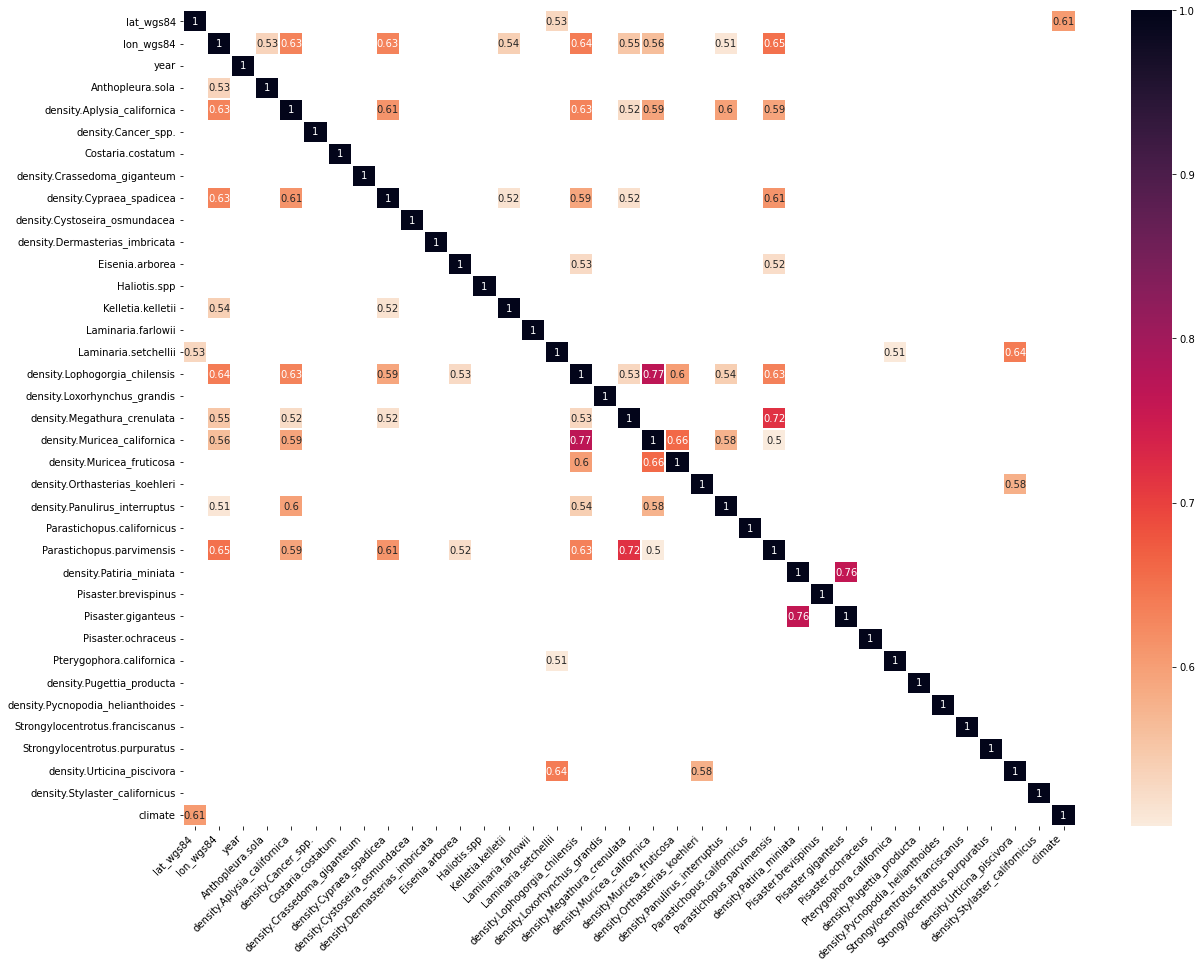

In [88]:
# Make a heatmap of correlations 
corr = df.corr()
l = corr[corr >= .5]                              #https://stackoverflow.com/questions/64019509/how-can-we-show-only-features-that-are-correlated-over-a-certain-threshold-in-a
plt.figure(figsize=(20,15))
g = sns.heatmap(l, cmap = 'rocket_r', linewidth = 1,annot = True)                                    
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
;

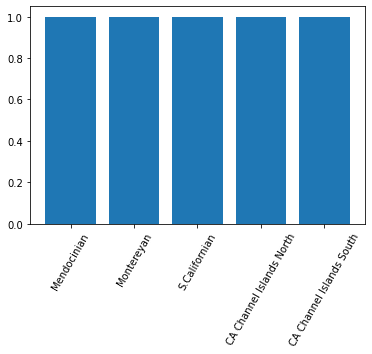

In [91]:
plt.bar(df['bioregion'],df['Strongylocentrotus.purpuratus'])    #identifying how many were observed at each location (purple urchin)
plt.xticks(rotation=60);

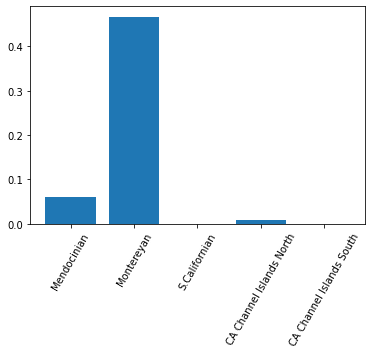

In [12]:
plt.bar(df['bioregion'],df['Costaria.costatum'])    
plt.xticks(rotation=60);

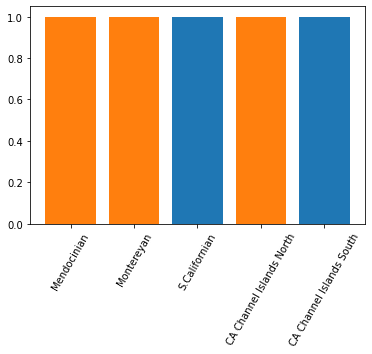

In [92]:
plt.bar(df['bioregion'],df['Strongylocentrotus.purpuratus'])    
plt.xticks(rotation=60)
plt.bar(df['bioregion'],df['Costaria.costatum'])    
plt.xticks(rotation=60);

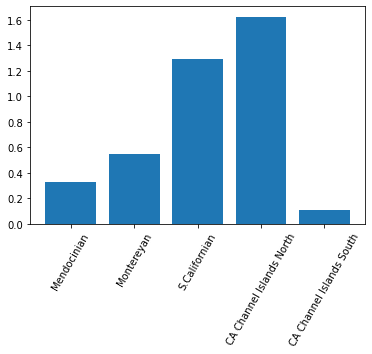

In [14]:
plt.bar(df['bioregion'],df['density.Cystoseira_osmundacea'])    
plt.xticks(rotation=60);

''

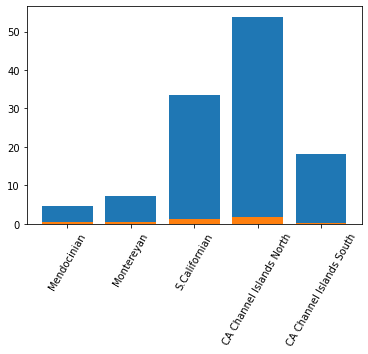

In [15]:
plt.bar(df['bioregion'],df['Strongylocentrotus.purpuratus'])    
plt.xticks(rotation=60)
plt.bar(df['bioregion'],df['density.Cystoseira_osmundacea'])    
plt.xticks(rotation=60)
;

''

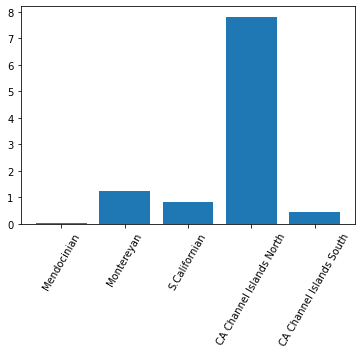

In [16]:
plt.bar(df['bioregion'],df['Eisenia.arborea'])    
plt.xticks(rotation=60)
;

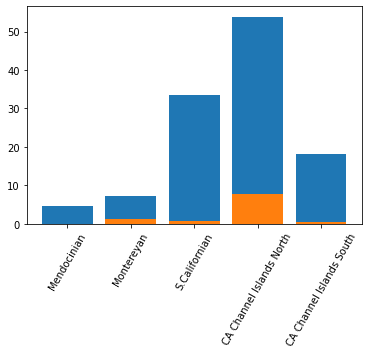

In [17]:
plt.bar(df['bioregion'],df['Strongylocentrotus.purpuratus'])    
plt.xticks(rotation=60)
plt.bar(df['bioregion'],df['Eisenia.arborea'])    
plt.xticks(rotation=60);

''

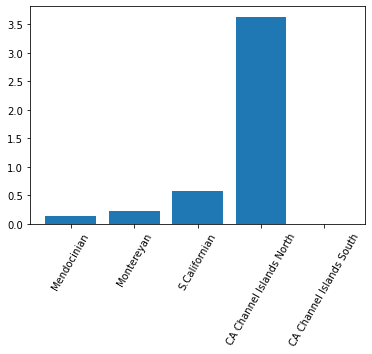

In [18]:
plt.bar(df['bioregion'],df['Laminaria.farlowii'])    
plt.xticks(rotation=60)
;

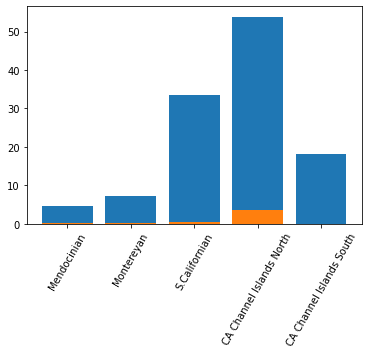

In [19]:
plt.bar(df['bioregion'],df['Strongylocentrotus.purpuratus'])    
plt.xticks(rotation=60)
plt.bar(df['bioregion'],df['Laminaria.farlowii'])    
plt.xticks(rotation=60);

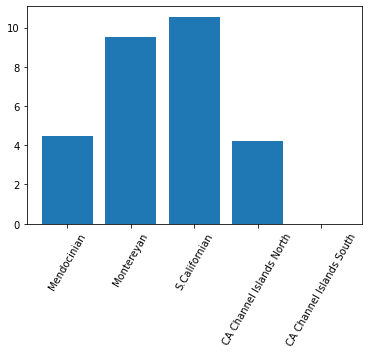

In [20]:
plt.bar(df['bioregion'],df['Pterygophora.californica'])    
plt.xticks(rotation=60);

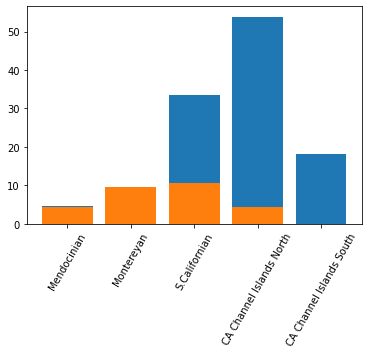

In [21]:
plt.bar(df['bioregion'],df['Strongylocentrotus.purpuratus'])    
plt.xticks(rotation=60)
plt.bar(df['bioregion'],df['Pterygophora.californica'])    
plt.xticks(rotation=60);